In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
from lib.vis import plot_session_intervals
from lib.course import LECTURES, ASSIGNMENTS, IDX_TO_LECTURE, IDX_TO_ASSIGNMENT
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
import datetime as dt
import pandas as pd
import seaborn as sns
# Pause data
import matplotlib as mpl
import matplotlib.dates as md

5341
053aede8-f36e-4eec-975d-a8b90120b53a
entered
entered
05eb966b-d9fb-4394-af83-a9670047c0e8
089a1d24-77e8-47ad-a5b1-aad401758b55
entered
entered
0a787656-62c6-4471-8f52-a97b0065e6df
entered
entered
0ad53fac-122b-4982-ba46-a96300966b16
entered
0ec0b1a0-af27-4c6d-a176-aad3018268d1
entered
entered
entered
entered
1074e64d-1e2e-4f1a-b05b-a8b60146851c
entered
entered
entered
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
entered
15b814ea-91a2-4733-819d-a9ec015ecf0f
165822a9-8c4c-4b10-8084-a96800d5c118
entered
entered
18250d37-5191-458d-825a-aa730184efc5
1e13c3f3-9195-4638-9ebd-aad20065c690
entered
entered
entered
entered
entered
entered
20c1375f-42f0-4251-afff-a9670005aa83
21168627-ddf7-4eca-b7b0-a9660104e28d
entered
25d221e2-007d-46a0-b36b-a965016712da
entered
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
2be27fae-bb37-4c9a-a7b1-a9650186c74a
35995a1c-0d3d-4f09-a29e-aad2001677b3
3878d0ef-09da-44c2-b441-a8b601564ffe
39c7d95d-e5dc-4d7f-9d7

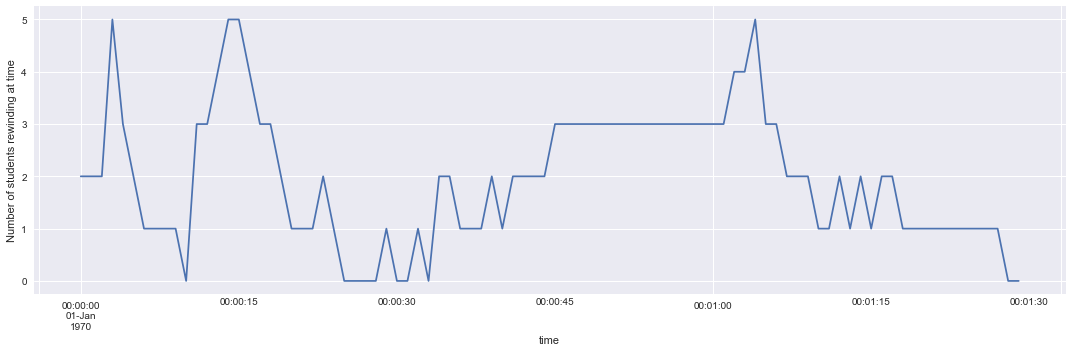

[2, 2, 2, 5, 3, 2, 1, 1, 1, 1, 0, 3, 3, 4, 5, 5, 4, 3, 3, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 3, 3, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


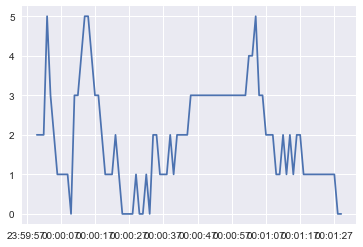

In [15]:
# Heatmap for rewind data
lecture = LECTURES[2]
df = lecture.viewing_data()
users = df.groupby("user")
users.head()
counts = []
user_ids = []
threshold = 100

max_time = int(df.end.max())+1
print(max_time)
bins = [0 for _ in range(0, int(max_time/60)+1)]
count_all = 0
for person in users:
    user_ids.append(person[0])
    print(person[0])
    count = 0
    start_times = person[1]["start"].values
    end_times = person[1]["end"].values
    for val in range(len(start_times) - 1):
        if end_times[val] > (start_times[val+1] + threshold):
            count+=1
            count_all+=1
            print("entered")
            for i in range(int(start_times[val+1]/60), int(end_times[val+1]/60)):
                bins[int(np.floor(i))] += 1
                print(i)
print(count_all)
time = [pd.Timestamp(i * 1e9) for i in range(0, int(max_time/60)+1)]
xfmt = md.DateFormatter('%H:%M:%S')
fig, ax = plt.subplots()

ax.xaxis.set_major_formatter(xfmt)
ax = pd.DataFrame({
    'viewers': bins,
    'time': time
}).plot('time', 'viewers', figsize=(15, 5), legend=False, ax=ax)
#         ax.set_title(
#             f'Total pauses by minute for "{IDX_TO_LECTURE[lec].name}"')
ax.set_ylabel('Number of students rewinding at time')
plt.tight_layout() # Fix bug that crops the ticks label
plt.show()
# plt.savefig('lect_lambda.pdf', dpi=300)
plt.plot(time, bins)
print(bins)